<a href="https://colab.research.google.com/github/kt3ch/Instagram_Style_Extractor/blob/main/Detectron2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and play with it yourself. __DO NOT__ request access to this tutorial.


# Install detectron2

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
from PIL import Image
import requests
from io import BytesIO
from urllib.request import urlopen


# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_cafdb1.pkl: 261MB [00:22, 11.8MB/s]                           


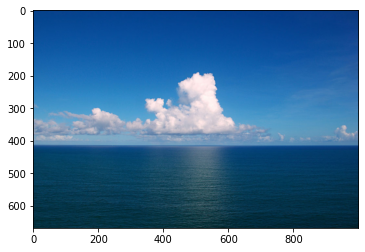

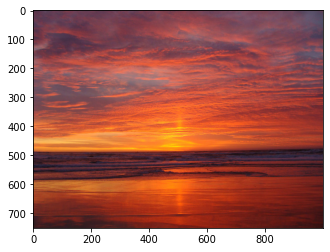

In [10]:
import matplotlib.pyplot as plt
url = r'https://github.com/jrosebr1/color_transfer/blob/master/images/ocean_day.jpg?raw=true'
r = requests.get(url, stream=True).raw
source = np.asarray(bytearray(r.read()), dtype="uint8")
source = cv2.imdecode(source, cv2.IMREAD_COLOR)
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

url = r'https://github.com/jrosebr1/color_transfer/blob/master/images/ocean_sunset.jpg?raw=true'
r = requests.get(url, stream=True).raw
target = np.asarray(bytearray(r.read()), dtype="uint8")
target = cv2.imdecode(target, cv2.IMREAD_COLOR)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

plt.imshow(source)
plt.show()
plt.imshow(target)
plt.show()

In [23]:
def get_segmented_image(predictor, im):
  panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
  v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
  to_write = np.array(panoptic_seg.cpu())
  print(segments_info)
  w = np.array([[segments_info[j - 1]['category_id'] for j in i] for i in to_write])
  np.savetxt("label.txt", w, delimiter=',', fmt='%d')
  return out.get_image()[:, :, ::-1]

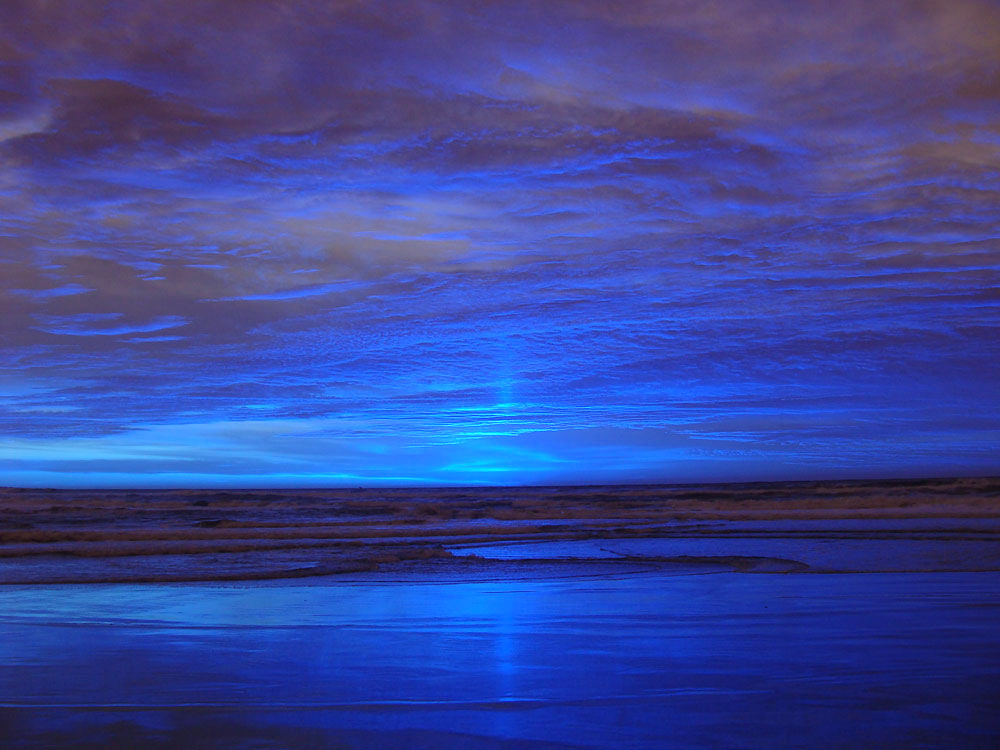

[{'id': 1, 'isthing': False, 'category_id': 23, 'area': 265802.0}, {'id': 2, 'isthing': False, 'category_id': 24, 'area': 107958.0}, {'id': 3, 'isthing': False, 'category_id': 40, 'area': 376240.0}]


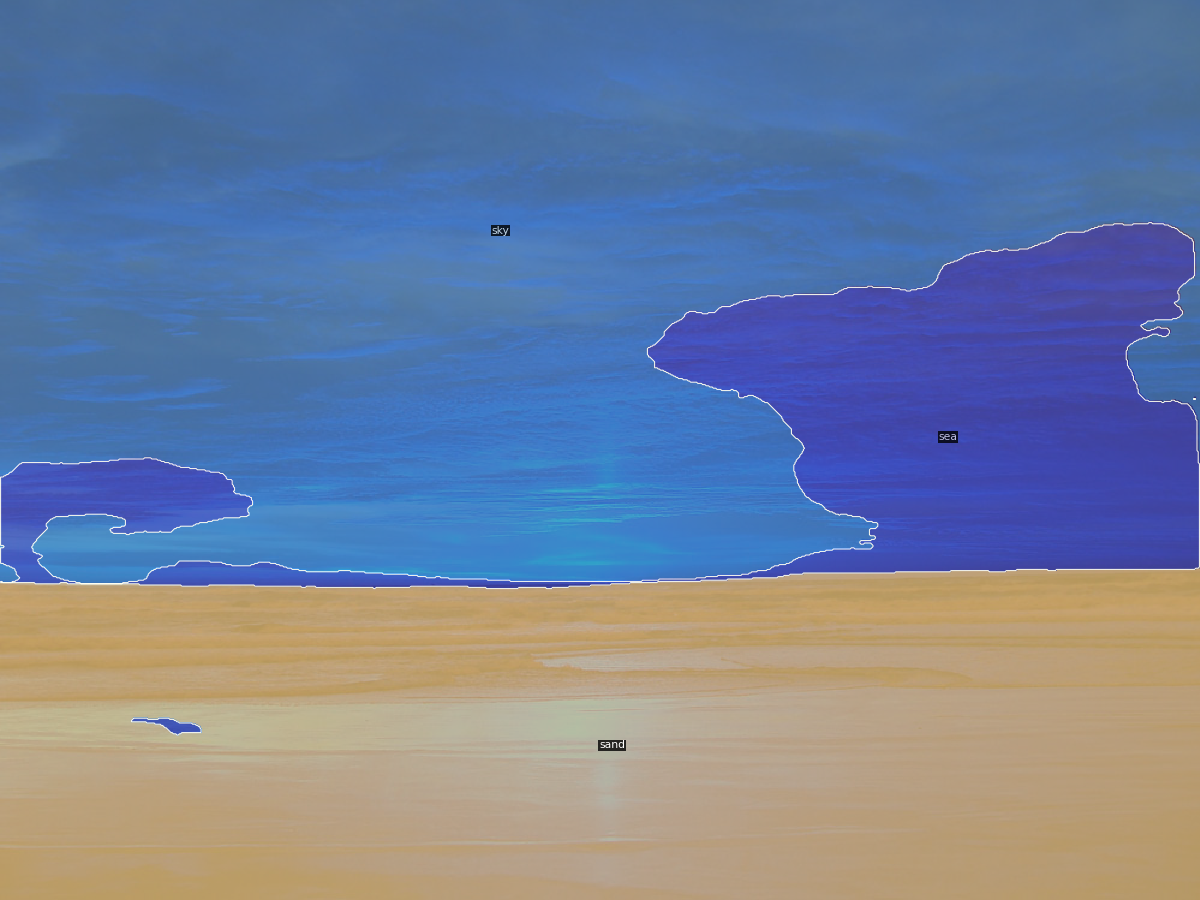

In [25]:
im = target
cv2_imshow(im)
cv2_imshow(get_segmented_image(predictor, im))

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

# Other types of builtin models

In [ ]:
import requests

url = "https://instagramdimashirokovv1.p.rapidapi.com/user/alexischiangg"

headers = {
    'x-rapidapi-key': "37bb9789d5msh181be887552353fp1d90dfjsn68e9e4673862",
    'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)



In [ ]:
jo = response.json()

In [ ]:
jo

{'message': 'You have exceeded the DAILY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/v.sobolev/api/Instagram'}

In [ ]:
url = jo['edge_owner_to_timeline_media']['edges'][11]['node']['thumbnail_resources'][-1]['src']

In [ ]:
im = Image.open(urlopen(url))
im.show()

In [ ]:
im.save("test.jpg")

[ 0  1  2  3  4  5  6  7  8  9 10]
[{'id': 1, 'isthing': True, 'score': 0.9938546419143677, 'category_id': 0, 'instance_id': 0, 'area': 3257.0}, {'id': 2, 'isthing': True, 'score': 0.9242581725120544, 'category_id': 0, 'instance_id': 1, 'area': 714.0}, {'id': 3, 'isthing': True, 'score': 0.8485912680625916, 'category_id': 0, 'instance_id': 2, 'area': 895.0}, {'id': 4, 'isthing': True, 'score': 0.6056690812110901, 'category_id': 0, 'instance_id': 3, 'area': 576.0}, {'id': 5, 'isthing': False, 'category_id': 22, 'area': 10038.0}, {'id': 6, 'isthing': False, 'category_id': 37, 'area': 75345.0}, {'id': 7, 'isthing': False, 'category_id': 38, 'area': 45224.0}, {'id': 8, 'isthing': False, 'category_id': 40, 'area': 60304.0}, {'id': 9, 'isthing': False, 'category_id': 44, 'area': 132302.0}, {'id': 10, 'isthing': False, 'category_id': 50, 'area': 76218.0}]


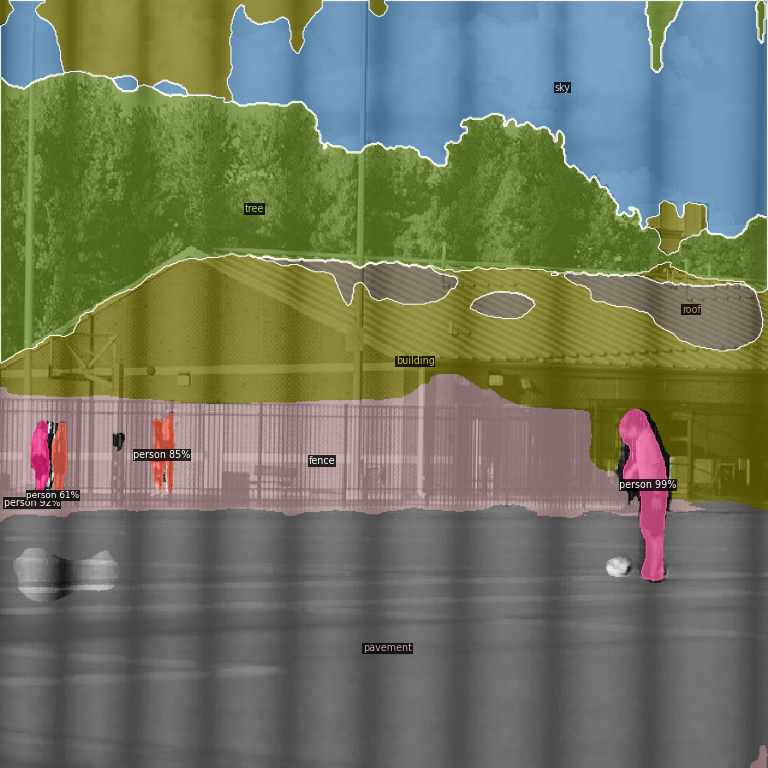

In [ ]:
cv2_imshow(get_segmented_image(predictor, "./test.jpg"))